In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/phishing-dataset-for-machine-learning/Phishing_Legitimate_full.csv


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

In [3]:
import pandas as pd 
df = pd.read_csv("/kaggle/input/phishing-dataset-for-machine-learning/Phishing_Legitimate_full.csv")

In [4]:
df.head()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1


In [5]:
df.dtypes

id                                      int64
NumDots                                 int64
SubdomainLevel                          int64
PathLevel                               int64
UrlLength                               int64
NumDash                                 int64
NumDashInHostname                       int64
AtSymbol                                int64
TildeSymbol                             int64
NumUnderscore                           int64
NumPercent                              int64
NumQueryComponents                      int64
NumAmpersand                            int64
NumHash                                 int64
NumNumericChars                         int64
NoHttps                                 int64
RandomString                            int64
IpAddress                               int64
DomainInSubdomains                      int64
DomainInPaths                           int64
HttpsInHostname                         int64
HostnameLength                    

In [6]:
df.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df.shape

(10000, 50)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

In [9]:
class_counts = df['CLASS_LABEL'].value_counts()
print(class_counts)

CLASS_LABEL
1    5000
0    5000
Name: count, dtype: int64


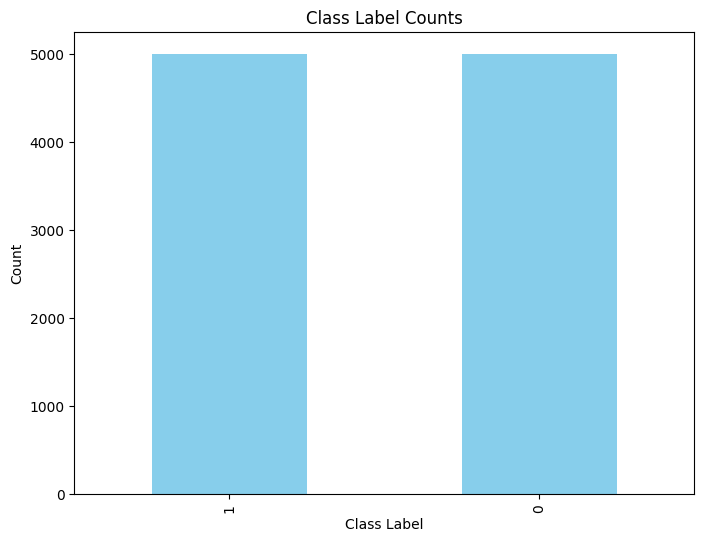

In [10]:
plt.figure(figsize=(8, 6))
class_counts.plot(kind='bar', color='skyblue')
plt.title('Class Label Counts')
plt.xlabel('Class Label')
plt.ylabel('Count')


plt.show()

In [11]:
correlations = []
for feature in df.columns[:-1]:  
    correlation = df['CLASS_LABEL'].corr(df[feature])
    correlations.append((feature, correlation))


correlations.sort(key=lambda x: abs(x[1]), reverse=True)


for feature, correlation in correlations:
    print(f"Correlation between {feature} and CLASS_LABEL: {correlation:.2f}")

Correlation between id and CLASS_LABEL: -0.87
Correlation between HttpsInHostname and CLASS_LABEL: nan
Correlation between PctExtNullSelfRedirectHyperlinksRT and CLASS_LABEL: -0.54
Correlation between FrequentDomainNameMismatch and CLASS_LABEL: 0.46
Correlation between NumDash and CLASS_LABEL: -0.37
Correlation between SubmitInfoToEmail and CLASS_LABEL: -0.36
Correlation between PctNullSelfRedirectHyperlinks and CLASS_LABEL: 0.34
Correlation between InsecureForms and CLASS_LABEL: 0.32
Correlation between NumDots and CLASS_LABEL: 0.29
Correlation between PctExtHyperlinks and CLASS_LABEL: 0.26
Correlation between NumSensitiveWords and CLASS_LABEL: 0.26
Correlation between IframeOrFrame and CLASS_LABEL: -0.24
Correlation between PathLevel and CLASS_LABEL: 0.23
Correlation between AbnormalExtFormActionR and CLASS_LABEL: 0.19
Correlation between UrlLengthRT and CLASS_LABEL: 0.17
Correlation between HostnameLength and CLASS_LABEL: 0.17
Correlation between NumDashInHostname and CLASS_LABEL: 0

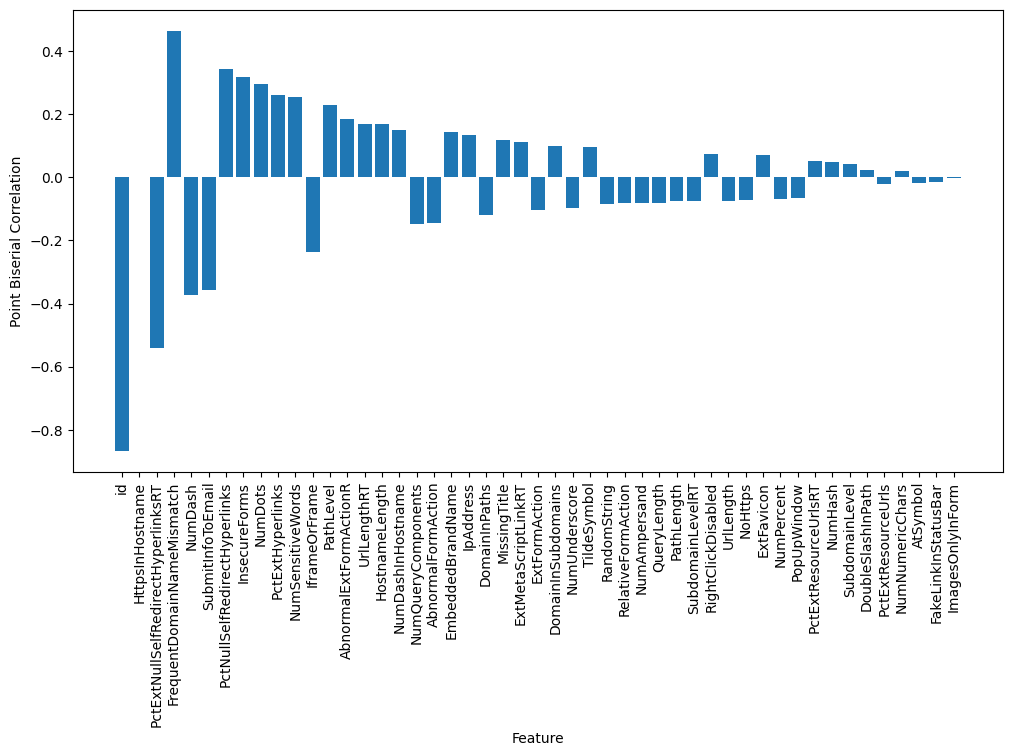

In [12]:
feature_names, feature_correlations = zip(*correlations)
plt.figure(figsize=(12, 6))
plt.bar(feature_names, feature_correlations)
plt.xlabel('Feature')
plt.ylabel('Point Biserial Correlation')
plt.xticks(rotation=90)
plt.show()

In [13]:
X = df.drop(columns=['CLASS_LABEL', 'id'])
y = df['CLASS_LABEL']


scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
model = keras.Sequential()

# Add input layer
model.add(keras.layers.Input(shape=(X_train.shape[1],)))

# Add hidden layers
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dense(32, activation='relu'))

# Add output layer
model.add(keras.layers.Dense(1, activation='sigmoid')) 

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
250/250 [==============================] - 2s 3ms/step - loss: 0.2561 - accuracy: 0.9014 - val_loss: 0.1437 - val_accuracy: 0.9445
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1248 - accuracy: 0.9531 - val_loss: 0.1267 - val_accuracy: 0.9545
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.1033 - accuracy: 0.9595 - val_loss: 0.1185 - val_accuracy: 0.9570
Epoch 4/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0884 - accuracy: 0.9665 - val_loss: 0.1058 - val_accuracy: 0.9600
Epoch 5/10
250/250 [==============================] - 1s 3ms/step - loss: 0.0754 - accuracy: 0.9712 - val_loss: 0.1012 - val_accuracy: 0.9610
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0667 - accuracy: 0.9751 - val_loss: 0.0937 - val_accuracy: 0.9630
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0579 - accuracy: 0.9812 - val_loss: 0.0890 - val_accuracy: 0.9670
Epoch 

In [16]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0380 - accuracy: 0.9870 - val_loss: 0.0848 - val_accuracy: 0.9715
Epoch 2/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0338 - accuracy: 0.9883 - val_loss: 0.0804 - val_accuracy: 0.9720
Epoch 3/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0312 - accuracy: 0.9900 - val_loss: 0.0814 - val_accuracy: 0.9730
Epoch 4/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0291 - accuracy: 0.9906 - val_loss: 0.0834 - val_accuracy: 0.9730
Epoch 5/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0256 - accuracy: 0.9916 - val_loss: 0.0887 - val_accuracy: 0.9700
Epoch 6/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0239 - accuracy: 0.9927 - val_loss: 0.0811 - val_accuracy: 0.9735
Epoch 7/10
250/250 [==============================] - 1s 2ms/step - loss: 0.0217 - accuracy: 0.9927 - val_loss: 0.0872 - val_accuracy: 0.9720
Epoch 

In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')

63/63 [==============================] - 0s 1ms/step - loss: 0.0816 - accuracy: 0.9755
Test Accuracy: 97.55%


In [18]:
y_pred = model.predict(X_test)

63/63 [==============================] - 0s 1ms/step


In [19]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)


In [20]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
class_report = classification_report(y_test, y_pred, target_names=['Non-Phishing', 'Phishing'])
print("Classification Report:")
print(class_report)



Classification Report:
              precision    recall  f1-score   support

Non-Phishing       0.61      1.00      0.76       988
    Phishing       1.00      0.38      0.56      1012

    accuracy                           0.69      2000
   macro avg       0.81      0.69      0.66      2000
weighted avg       0.81      0.69      0.66      2000



In [21]:
from sklearn.ensemble import RandomForestClassifier

Accuracy: 0.9825
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       988
           1       0.98      0.98      0.98      1012

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



<Axes: >

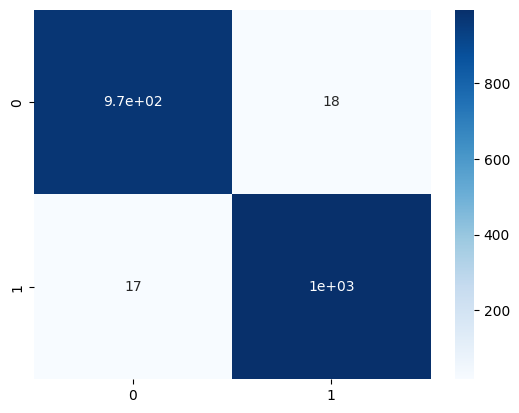

In [22]:
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Model training
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues')